In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [60]:
df=pd.read_csv(r'https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<Axes: >

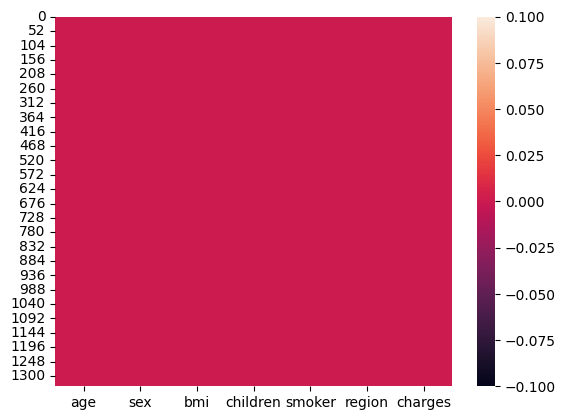

In [10]:
sns.heatmap(df.isnull())

In [11]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [14]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')
    

age
18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64


sex
male      676
female    662
Name: count, dtype: int64


bmi
32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: count, Length: 548, dtype: int64


children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64


smoker
no     1064
yes     274
Name: count, dtype: int64


region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


charges
1639.56310     2
16884.92400    1
29

In [ ]:
# There is no  blank 

In [ ]:
# Covert Columns From String ['sex','smoker', 'region' ] To Numerical Values

In [61]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))
df.tail(15)

,age,sex,bmi,children,smoker,region,charges
1323,42,0.0,40.370,2,1.0,2.0,43896.37630
1324,31,1.0,25.935,1,0.0,1.0,4239.89265
1325,61,1.0,33.535,0,0.0,0.0,13143.33665
1326,42,0.0,32.870,0,0.0,0.0,7050.02130
1327,51,1.0,30.030,1,0.0,2.0,9377.90470
1328,23,0.0,24.225,2,0.0,0.0,22395.74424
1329,52,1.0,38.600,2,0.0,3.0,10325.20600
1330,57,0.0,25.740,2,0.0,2.0,12629.16560
1331,23,0.0,33.400,0,0.0,3.0,10795.93733
1332,52,0.0,44.700,3,0.0,3.0,11411.68500


In [62]:
x=df.drop('charges',axis=1)
y=df['charges']

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   float64
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   float64
 5   region    1338 non-null   float64
 6   charges   1338 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 73.3 KB


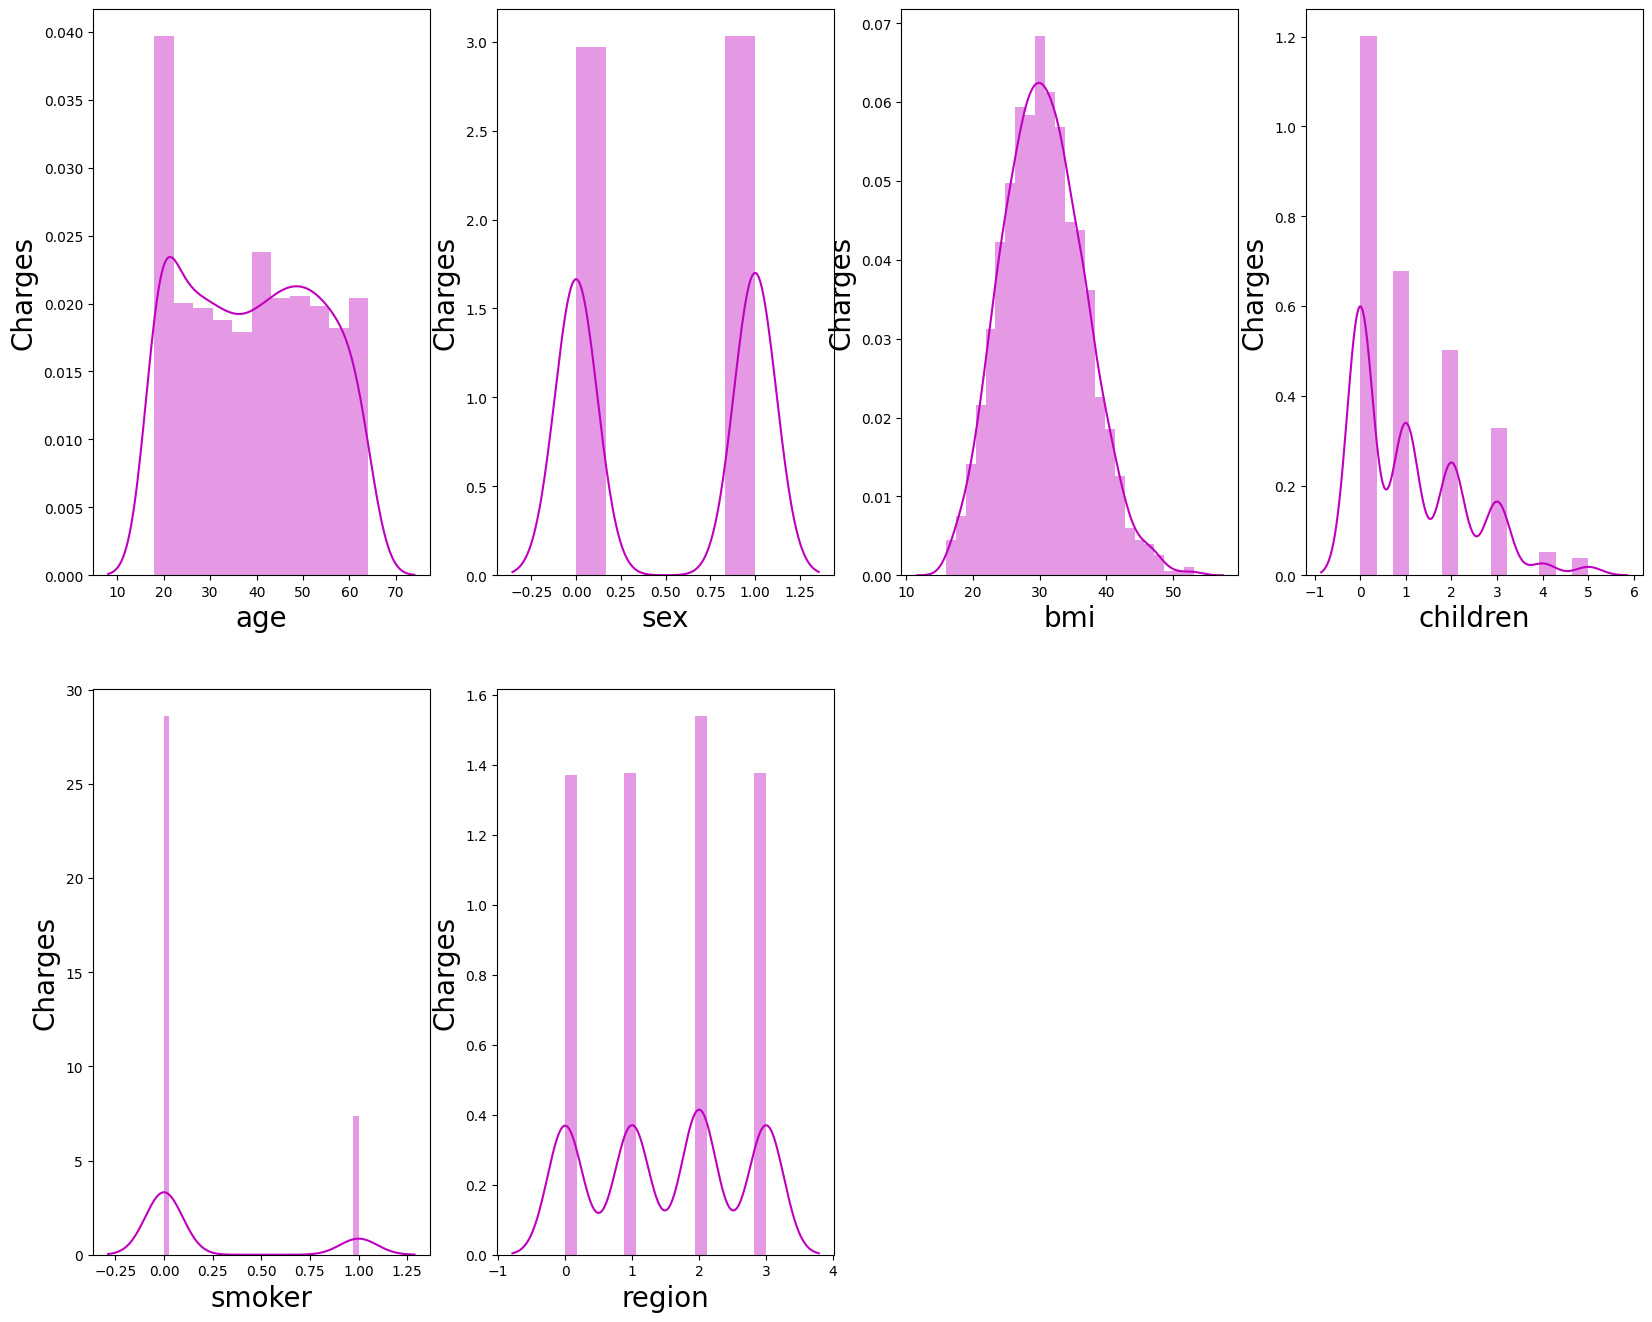

In [64]:
plt.figure(figsize=(20,25),facecolor='white')
p=1
for i in x:
    axs=plt.subplot(3,4,p)
    sns.distplot(df[i],color='m')
    plt.xlabel(i,fontsize=20)
    plt.ylabel('Charges',fontsize=20)
    p+=1
plt.show()

In [65]:
df.skew()

age         0.055673
sex        -0.020951
bmi         0.284047
children    0.938380
smoker      1.464766
region     -0.038101
charges     1.515880
dtype: float64

1) For Nearly Symmetric Data: Columns like age, sex, bmi, and region do not require transformation.

2) For Highly Skewed Data: Columns like smoker and charges often require transformation to normalize the distribution

In [66]:

#Removing the sewness using cuberoot method
df['smoker']=np.cbrt(df['smoker'])
df['charges']=np.cbrt(df['charges'])
df.skew()

age         0.055673
sex        -0.020951
bmi         0.284047
children    0.938380
smoker      1.464766
region     -0.038101
charges     0.515183
dtype: float64

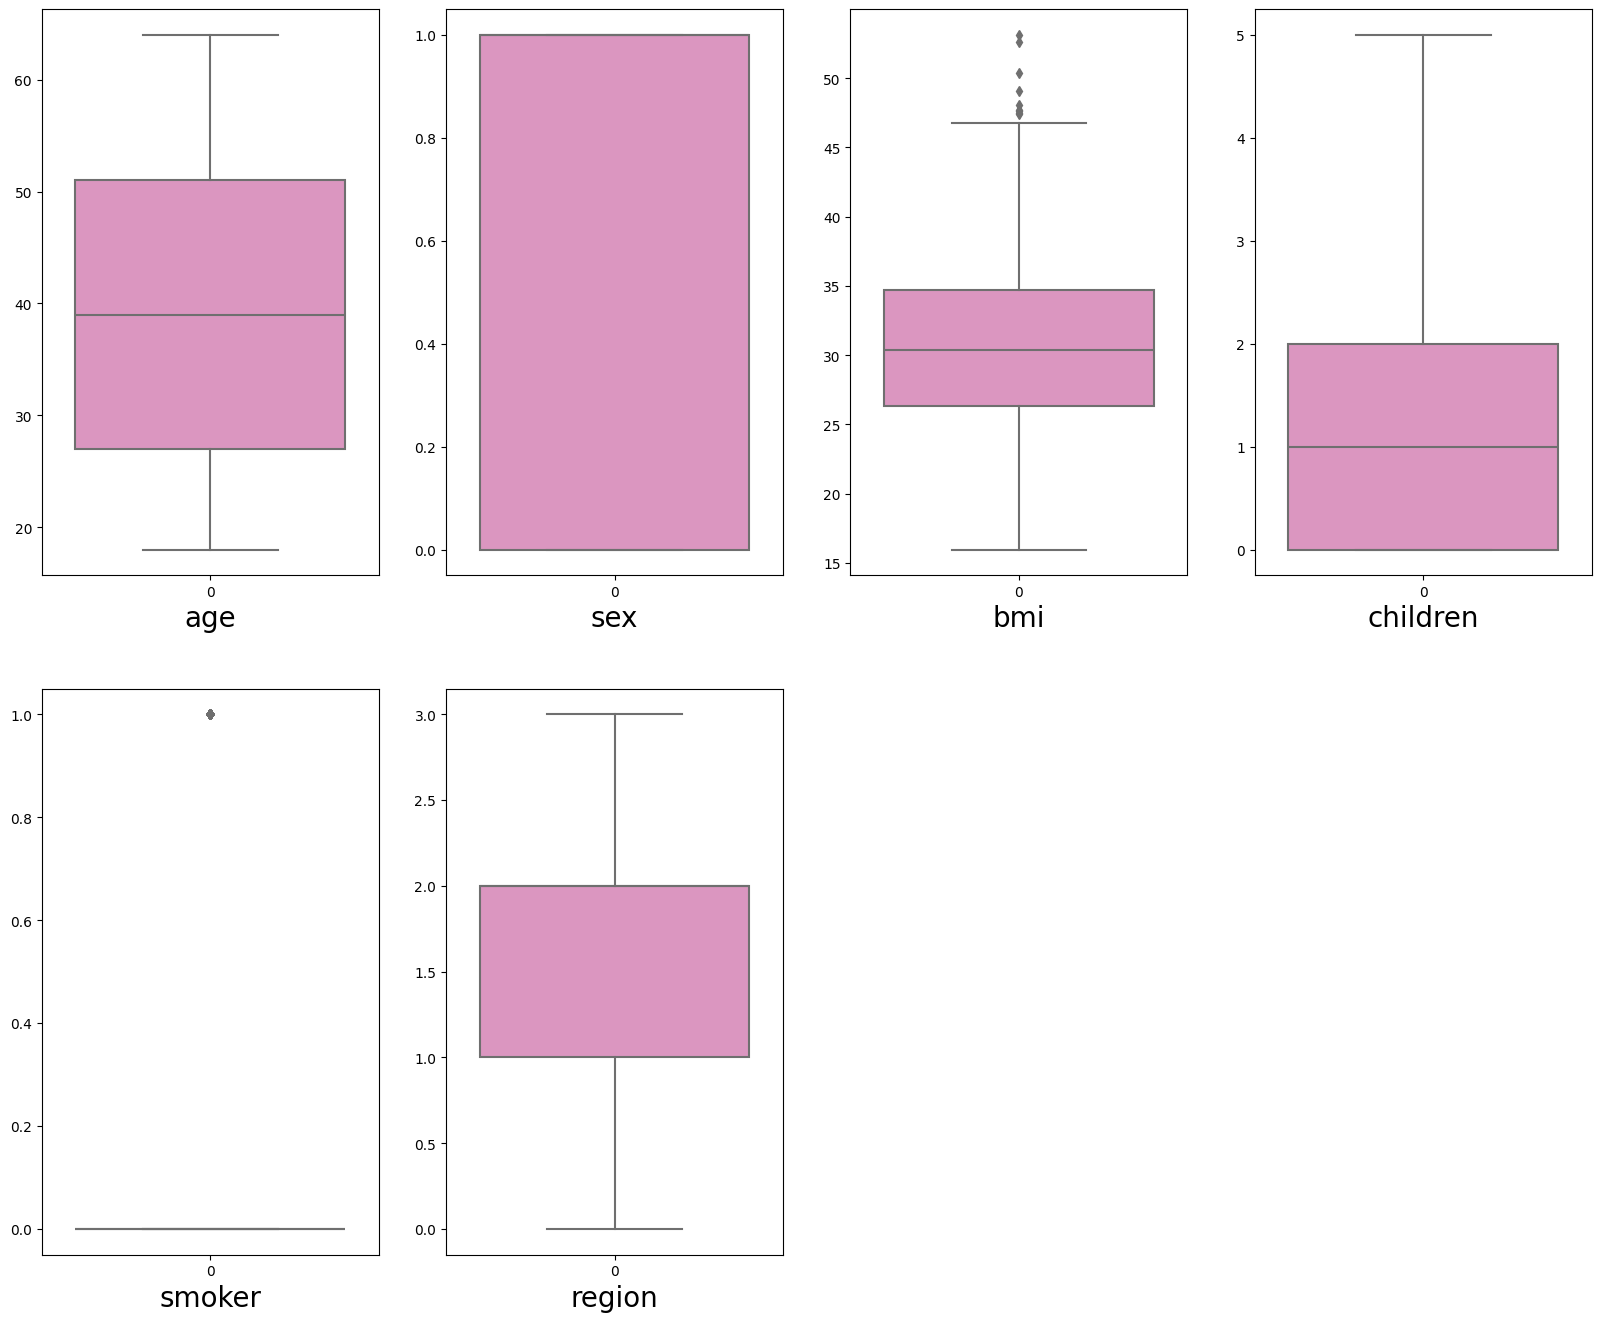

In [67]:
plt.figure(figsize=(20,25),facecolor='white')
p=1
for i in x:
    plt.subplot(3,4,p)
    sns.boxplot(df[i],palette='Set2_r')
    plt.xlabel(i,fontsize='20')
    p=p+1
plt.show()

In [68]:
df['smoker'].value_counts()

smoker
0.0    1064
1.0     274
Name: count, dtype: int64

In [69]:
from scipy.stats import zscore
out_features=df[['bmi','smoker']]
z=np.abs(zscore(out_features))
z

,bmi,smoker
0,0.453320,1.970587
1,0.509621,0.507463
2,0.383307,0.507463
3,1.305531,0.507463
4,0.292556,0.507463
...,...,...
1333,0.050297,0.507463
1334,0.206139,0.507463
1335,1.014878,0.507463
1336,0.797813,0.507463


In [70]:
# Deleting all which > 3 zscore

New_df=df[(z<3).all(axis=1)]
print(New_df.shape)
print(df.shape)

(1334, 7)
(1338, 7)


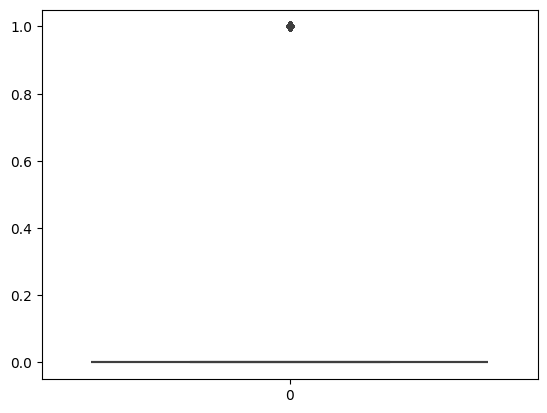

In [71]:
sns.boxplot(df['smoker'])
plt.show()

In [72]:
print('Data Loss percentage: ' ,((df.shape[0]-New_df.shape[0])/df.shape[0])*100)
  # precentage should not more than 10% other wise we have to use another method to remove outliars or something else

Data Loss percentage:  0.29895366218236175


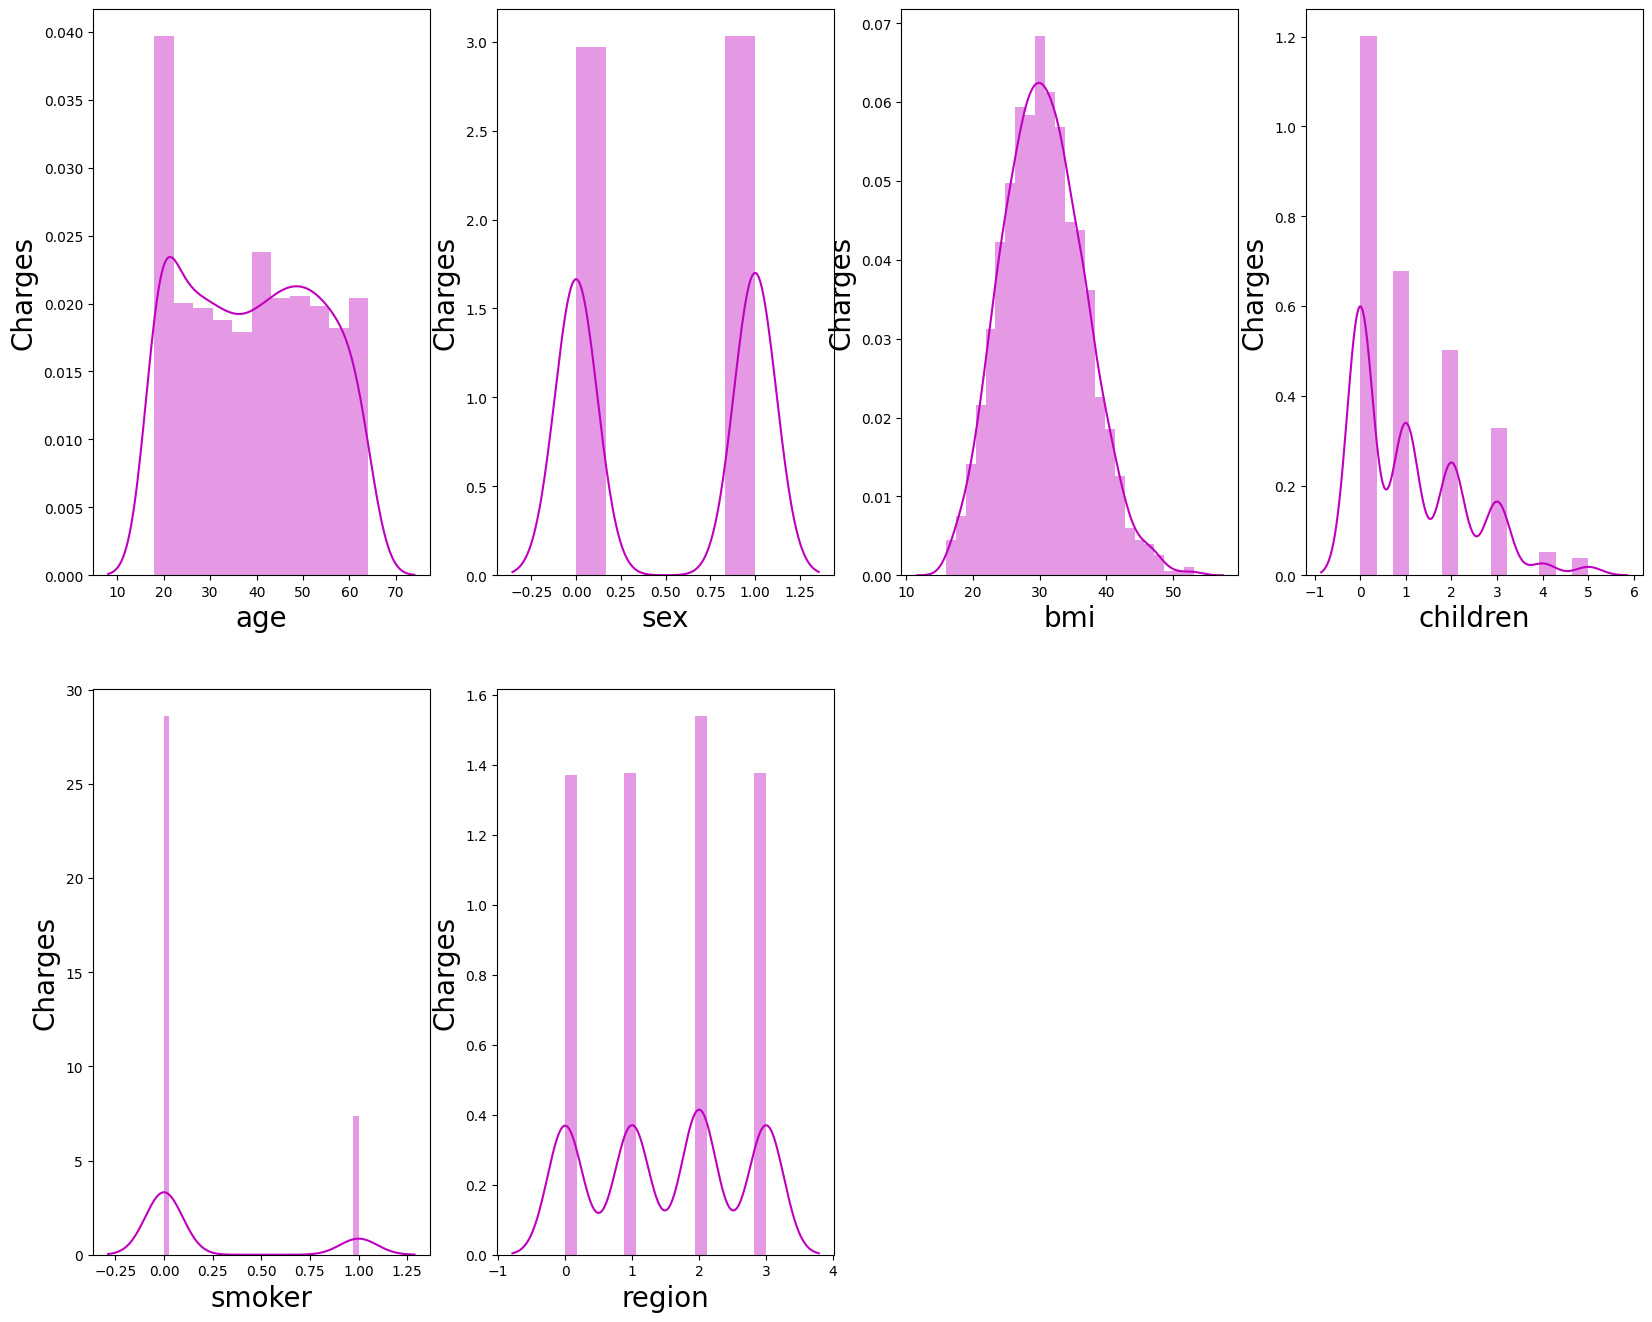

In [73]:
x=New_df.drop('charges',axis=1)
y=New_df['charges']
plt.figure(figsize=(20,25),facecolor='white')
p=1
for i in x:
    axs=plt.subplot(3,4,p)
    sns.distplot(df[i],color='m')
    plt.xlabel(i,fontsize=20)
    plt.ylabel('Charges',fontsize=20)
    p+=1
plt.show()

In [74]:
New_df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.019041,0.118887,0.042345,-0.023820,0.002974,0.452792
sex,-0.019041,1.000000,0.037031,0.018667,0.076096,0.003293,0.028262
bmi,0.118887,0.037031,1.000000,0.018054,0.002264,0.155877,0.161598
children,0.042345,0.018667,0.018054,1.000000,0.007087,0.017234,0.123394
smoker,-0.023820,0.076096,0.002264,0.007087,1.000000,-0.002333,0.732108
region,0.002974,0.003293,0.155877,0.017234,-0.002333,1.000000,-0.029662
charges,0.452792,0.028262,0.161598,0.123394,0.732108,-0.029662,1.000000


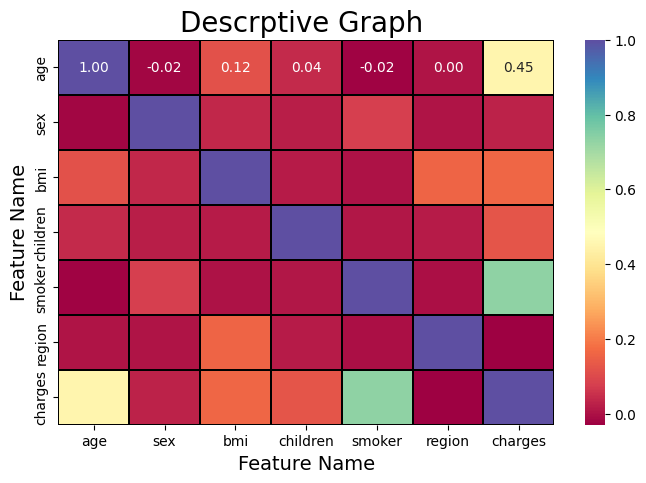

In [75]:
plt.figure(figsize=(8,5))
sns.heatmap(New_df.corr(),annot=True,fmt='0.2f',linewidths=0.2,linecolor='black',cmap='Spectral')
plt.xlabel('Feature Name',fontsize=14)
plt.ylabel('Feature Name',fontsize=14)
plt.title('Descrptive Graph ',fontsize=20)
plt.show()

In [77]:
# Feature scaling using standard scaralization

from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()

x=pd.DataFrame(Scaler.fit_transform(x),columns=x.columns)
x
# now we have scaled the features by standard scaler to remove the biasness in feature , we do not scaled Target in any case

,age,sex,bmi,children,smoker,region
0,-1.442249,-1.007525,-0.450359,-0.909299,1.971407,1.343594
1,-1.513528,0.992532,0.528191,-0.080177,-0.507252,0.439278
2,-0.800739,0.992532,0.399829,1.578066,-0.507252,0.439278
3,-0.444344,0.992532,-1.316383,-0.909299,-0.507252,-0.465038
4,-0.515623,0.992532,-0.286989,-0.909299,-0.507252,-0.465038
...,...,...,...,...,...,...
1329,0.767397,0.992532,0.061421,1.578066,-0.507252,-0.465038
1330,-1.513528,-1.007525,0.219789,-0.909299,-0.507252,-1.369355
1331,-1.513528,-1.007525,1.041637,-0.909299,-0.507252,0.439278
1332,-1.299692,-1.007525,-0.800436,-0.909299,-0.507252,1.343594


In [78]:
# Now checking Variance inflation factor (VIF) in each scaled columns i.e x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['VIF_Values']=[variance_inflation_factor (x.values,i) for i in range (len(x.columns))]
vif['Features']=x.columns
vif

,VIF_Values,Features
0,1.017416,age
1,1.008033,sex
2,1.041585,bmi
3,1.002610,children
4,1.006389,smoker
5,1.025419,region


Interpretation of VIF Results
VIF < 5: Generally indicates no multicollinearity.
5 ≤ VIF < 10: Indicates moderate multicollinearity.
VIF ≥ 10: Indicates high multicollinearity and suggests that the variable should be investigated further.

In [ ]:
# Train Test split

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from  sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN


In [84]:
# Creating Train test split & LinearRegression

maxAcc=0
maxRS=0
for i in range ( 1, 200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print('Max r2_scoer: ',maxAcc,'on random state: ',maxRS)


Max r2_scoer:  0.797087100344656 on random state:  199


In [85]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [86]:
LR=LinearRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
pred_Train=LR.predict(x_train)
print(LR)
print('R2_Score:', r2_score(y_test,predLR))
print('R2 Score on traing data: ', r2_score(y_train,pred_Train))
print('Mean absulute error:', mean_absolute_error(y_test,predLR))
print('Mean scuared error: :', mean_squared_error(y_test,predLR))
print('Root Mean scuared error: :', np.sqrt(mean_squared_error(y_test,predLR)))

LinearRegression()
R2_Score: 0.797087100344656
R2 Score on traing data:  0.7728669304513703
Mean absulute error: 1.8356474112663548
Mean scuared error: : 7.990334550212016
Root Mean scuared error: : 2.8267179820795736


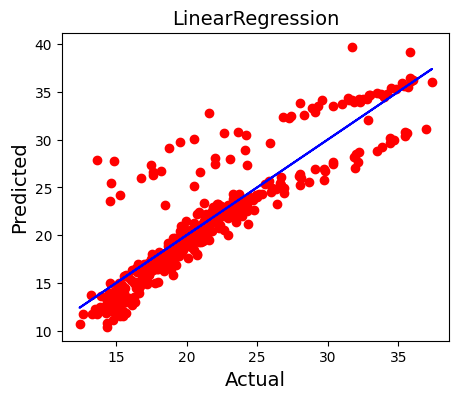

In [88]:
plt.figure(figsize=(5,4))
plt.scatter(x=predLR,y=y_test,color='red')
plt.plot(predLR,predLR,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('LinearRegression',fontsize=14)
plt.show()

In [89]:
RDF=RandomForestRegressor()
RDF.fit(x_train,y_train)
pred_RDF=RDF.predict(x_test)
pred_Train=RDF.predict(x_train)
print(RDF)
print('R2_Score:', r2_score(y_test,pred_RDF))
print('R2 Score on traing data: ', r2_score(y_train,pred_Train))
print('Mean absulute error:', mean_absolute_error(y_test,pred_RDF))
print('Mean scuared error: :', mean_squared_error(y_test,pred_RDF))
print('Root Mean scuared error: :', np.sqrt(mean_squared_error(y_test,pred_RDF)))

RandomForestRegressor()
R2_Score: 0.8072994426666
R2 Score on traing data:  0.9725777502351037
Mean absulute error: 1.57359705393149
Mean scuared error: : 7.5881914048909325
Root Mean scuared error: : 2.7546672040177436


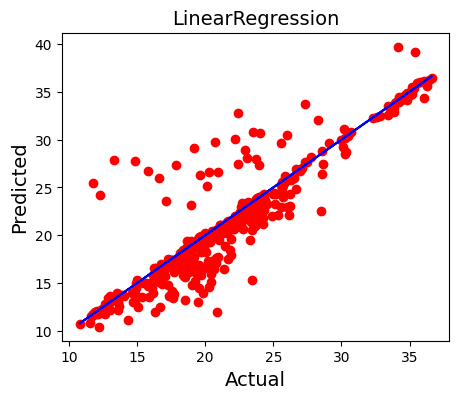

In [91]:
plt.figure(figsize=(5,4))
plt.scatter(x=pred_RDF,y=y_test,color='red')
plt.plot(pred_RDF,pred_RDF,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('LinearRegression',fontsize=14)
plt.show()

KNeighborsRegressor()
R2_Score: 0.8016495170820359
R2 Score on traing data:  0.8598181333990365
Mean absulute error: 1.7234889290900612
Mean scuared error: : 7.810675020674598
Root Mean scuared error: : 2.7947584905810015


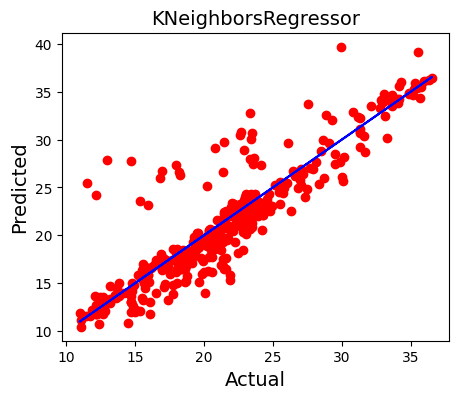

In [92]:
KN=KNN()
KN.fit(x_train,y_train)
pred_KN=KN.predict(x_test)
pred_Train=KN.predict(x_train)
print(KN)
print('R2_Score:', r2_score(y_test,pred_KN))
print('R2 Score on traing data: ', r2_score(y_train,pred_Train))
print('Mean absulute error:', mean_absolute_error(y_test,pred_KN))
print('Mean scuared error: :', mean_squared_error(y_test,pred_KN))
print('Root Mean scuared error: :', np.sqrt(mean_squared_error(y_test,pred_KN)))

plt.figure(figsize=(5,4))
plt.scatter(x=pred_KN,y=y_test,color='red')
plt.plot(pred_KN,pred_KN,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('KNeighborsRegressor',fontsize=14)
plt.show()

GradientBoostingRegressor()
R2_Score: 0.836382285971595
R2 Score on traing data:  0.888023647830163
Mean absulute error: 1.4424720966291138
Mean scuared error: : 6.442962845873669
Root Mean scuared error: : 2.538299203378843


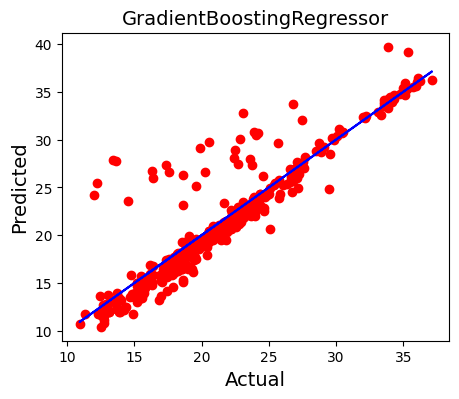

In [94]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=GBR.predict(x_test)
pred_Train=GBR.predict(x_train)
print(GBR)
print('R2_Score:', r2_score(y_test,pred_GBR))
print('R2 Score on traing data: ', r2_score(y_train,pred_Train))
print('Mean absulute error:', mean_absolute_error(y_test,pred_GBR))
print('Mean scuared error: :', mean_squared_error(y_test,pred_GBR))
print('Root Mean scuared error: :', np.sqrt(mean_squared_error(y_test,pred_GBR)))

plt.figure(figsize=(5,4))
plt.scatter(x=pred_GBR,y=y_test,color='red')
plt.plot(pred_GBR,pred_GBR,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('GradientBoostingRegressor',fontsize=14)
plt.show()

Lasso()
R2_Score: 0.7306043960425912
R2 Score on traing data:  0.7009791575106613
Mean absulute error: 2.414222614420453
Mean scuared error: : 10.608300436454908
Root Mean scuared error: : 3.257038599165645


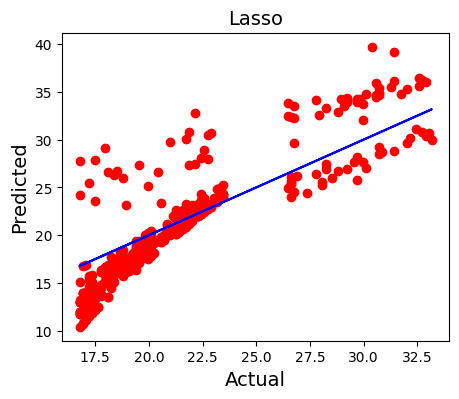

In [96]:
LS=Lasso()
LS.fit(x_train,y_train)
pred_LS=LS.predict(x_test)
pred_Train=LS.predict(x_train)
print(LS)
print('R2_Score:', r2_score(y_test,pred_LS))
print('R2 Score on traing data: ', r2_score(y_train,pred_Train))
print('Mean absulute error:', mean_absolute_error(y_test,pred_LS))
print('Mean scuared error: :', mean_squared_error(y_test,pred_LS))
print('Root Mean scuared error: :', np.sqrt(mean_squared_error(y_test,pred_LS)))

plt.figure(figsize=(5,4))
plt.scatter(x=pred_LS,y=y_test,color='red')
plt.plot(pred_LS,pred_LS,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Lasso',fontsize=14)
plt.show()

Ridge()
R2_Score: 0.7970683546794781
R2 Score on traing data:  0.7728660897494817
Mean absulute error: 1.8371350940748712
Mean scuared error: : 7.9910727198226805
Root Mean scuared error: : 2.826848549148447


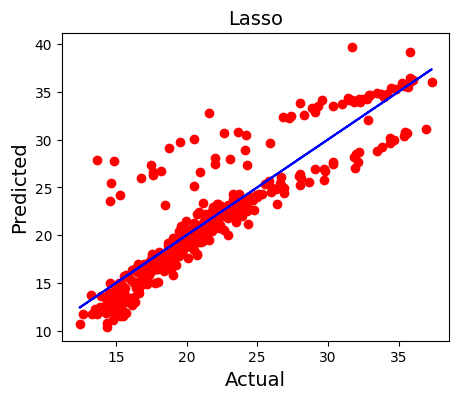

In [97]:
RD=Ridge()
RD.fit(x_train,y_train)
pred_RD=RD.predict(x_test)
pred_Train=RD.predict(x_train)
print(RD)
print('R2_Score:', r2_score(y_test,pred_RD))
print('R2 Score on traing data: ', r2_score(y_train,pred_Train))
print('Mean absulute error:', mean_absolute_error(y_test,pred_RD))
print('Mean scuared error: :', mean_squared_error(y_test,pred_RD))
print('Root Mean scuared error: :', np.sqrt(mean_squared_error(y_test,pred_RD)))

plt.figure(figsize=(5,4))
plt.scatter(x=pred_RD,y=y_test,color='red')
plt.plot(pred_RD,pred_RD,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Lasso',fontsize=14)
plt.show()

DecisionTreeRegressor()
R2_Score: 0.6093655344558999
R2 Score on traing data:  1.0
Mean absulute error: 1.7962331291593052
Mean scuared error: : 15.382462484358003
Root Mean scuared error: : 3.9220482511511765


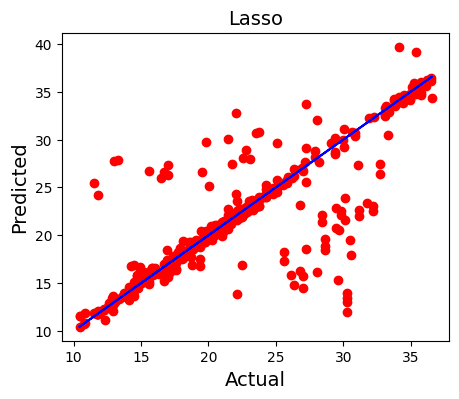

In [98]:
DT=DecisionTreeRegressor()
DT.fit(x_train,y_train)
pred_DT=DT.predict(x_test)
pred_Train=DT.predict(x_train)
print(DT)
print('R2_Score:', r2_score(y_test,pred_DT))
print('R2 Score on traing data: ', r2_score(y_train,pred_Train))
print('Mean absulute error:', mean_absolute_error(y_test,pred_DT))
print('Mean scuared error: :', mean_squared_error(y_test,pred_DT))
print('Root Mean scuared error: :', np.sqrt(mean_squared_error(y_test,pred_DT)))

plt.figure(figsize=(5,4))
plt.scatter(x=pred_DT,y=y_test,color='red')
plt.plot(pred_DT,pred_DT,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Lasso',fontsize=14)
plt.show()

SVR()
R2_Score: 0.8365606541379569
R2 Score on traing data:  0.8158631970085688
Mean absulute error: 1.0252171239064052
Mean scuared error: : 6.43593903750683
Root Mean scuared error: : 2.536915260214032


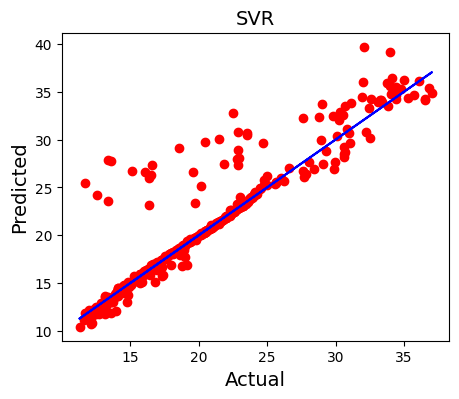

In [99]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
pred_Train=svr.predict(x_train)
print(svr)
print('R2_Score:', r2_score(y_test,pred_svr))
print('R2 Score on traing data: ', r2_score(y_train,pred_Train))
print('Mean absulute error:', mean_absolute_error(y_test,pred_svr))
print('Mean scuared error: :', mean_squared_error(y_test,pred_svr))
print('Root Mean scuared error: :', np.sqrt(mean_squared_error(y_test,pred_svr)))

plt.figure(figsize=(5,4))
plt.scatter(x=pred_svr,y=y_test,color='red')
plt.plot(pred_svr,pred_svr,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('SVR',fontsize=14)
plt.show()

ExtraTreesRegressor()
R2_Score: 0.7805193063759055
R2 Score on traing data:  1.0
Mean absulute error: 1.533889045239585
Mean scuared error: : 8.642743622253066
Root Mean scuared error: : 2.939854353918416


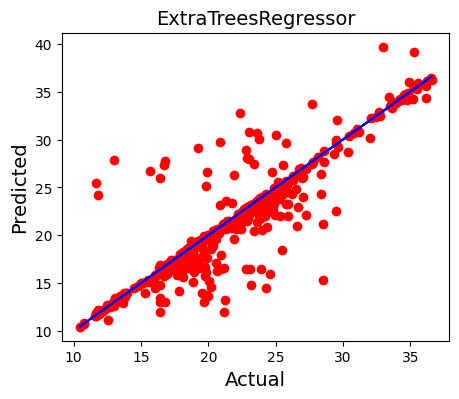

In [101]:
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_etr=etr.predict(x_test)
pred_Train=etr.predict(x_train)
print(etr)
print('R2_Score:', r2_score(y_test,pred_etr))
print('R2 Score on traing data: ', r2_score(y_train,pred_Train))
print('Mean absulute error:', mean_absolute_error(y_test,pred_etr))
print('Mean scuared error: :', mean_squared_error(y_test,pred_etr))
print('Root Mean scuared error: :', np.sqrt(mean_squared_error(y_test,pred_etr)))

plt.figure(figsize=(5,4))
plt.scatter(x=pred_etr,y=y_test,color='red')
plt.plot(pred_etr,pred_etr,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('ExtraTreesRegressor',fontsize=14)
plt.show()

In [102]:
from sklearn.model_selection import cross_val_score


In [105]:
score1=cross_val_score(LR,x,y,cv=5, scoring='r2')
print(score1)
print(score1.mean())
print('Difference between r2score and cross validation score is: ', (r2_score(y_test,predLR)-score1.mean()*100))

[0.807157   0.70661897 0.83284962 0.77160751 0.76672639]
0.7769918985991483
Difference between r2score and cross validation score is:  -76.90210275957017


In [106]:
score=cross_val_score(RDF,x,y,cv=5, scoring='r2')
print(score)
print(score.mean())
print('Difference between r2score and cross validation score is: ', (r2_score(y_test,pred_RDF)-score.mean()*100))

[0.84241552 0.71446475 0.85439162 0.81820046 0.81525299]
0.8089450671002968
Difference between r2score and cross validation score is:  -80.08720726736307


In [107]:
score=cross_val_score(KN,x,y,cv=5, scoring='r2')
print(score)
print(score.mean())
print('Difference between r2score and cross validation score is: ', (r2_score(y_test,pred_KN)-score.mean()*100))

[0.83775631 0.70525448 0.83775677 0.80329883 0.79504403]
0.7958220857179436
Difference between r2score and cross validation score is:  -78.78055905471231


In [108]:
score=cross_val_score(GBR,x,y,cv=5, scoring='r2')
print(score)
print(score.mean())
print('Difference between r2score and cross validation score is: ', (r2_score(y_test,pred_GBR)-score.mean()*100)) 


[0.86557476 0.74741166 0.89449646 0.83487314 0.8244306 ]
0.8333573252721654
Difference between r2score and cross validation score is:  -82.49935024124495


In [109]:
score=cross_val_score(LS,x,y,cv=5, scoring='r2')
print(score)
print(score.mean())
print('Difference between r2score and cross validation score is: ', (r2_score(y_test,pred_LS)-score.mean()*100))

[0.73425487 0.66499294 0.72711103 0.70676913 0.70562014]
0.7077496214266823
Difference between r2score and cross validation score is:  -70.04435774662564


In [110]:
score=cross_val_score(DT,x,y,cv=5, scoring='r2')
print(score)
print(score.mean())
print('Difference between r2score and cross validation score is: ', (r2_score(y_test,pred_DT)-score.mean()*100))

[0.72653718 0.60691926 0.67208347 0.6847533  0.58036823]
0.654132288816381
Difference between r2score and cross validation score is:  -64.80386334718219


In [111]:
score=cross_val_score(svr,x,y,cv=5, scoring='r2')
print(score)
print(score.mean())
print('Difference between r2score and cross validation score is: ', (r2_score(y_test,pred_svr)-score.mean()*100))

[0.86891977 0.71982002 0.87841115 0.80615897 0.79780356]
0.8142226938099373
Difference between r2score and cross validation score is:  -80.58570872685577


In [112]:
score=cross_val_score(etr,x,y,cv=5, scoring='r2')
print(score)
print(score.mean())
print('Difference between r2score and cross validation score is: ', (r2_score(y_test,pred_etr)-score.mean()*100)) 


[0.81259046 0.68174739 0.83641088 0.79296281 0.80034805]
0.7848119190483972
Difference between r2score and cross validation score is:  -77.70067259846381


In [113]:
score=cross_val_score(RD,x,y,cv=5, scoring='r2')
print(score)
print(score.mean())
print('Difference between r2score and cross validation score is: ', (r2_score(y_test,pred_RD)-score.mean()*100)) 


[0.80712074 0.7067483  0.83271924 0.7716494  0.76673734]
0.7769950040324021
Difference between r2score and cross validation score is:  -76.90243204856073


In [ ]:
 # hence the DecisionTreeRegressor() is the best Model for this problem as it's Difference between r2score and cross validation score is
    lesser than the others.
# The model with the smaller negative difference is considered better as it indicates that the model's R2 score is closer to the mean cross-validation score
    


In [117]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
import numpy as np
import pandas as pd


# Define the parameter grid
param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'random_state': [1, 4, 10, 20]
}

# Create GridSearchCV object
gscv = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5)
gscv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'random_state': [1, 4, 10, 20]})

In [118]:
Best_param=gscv.best_params_
Best_param

{'max_depth': 5,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'random_state': 1}

In [119]:
Model=DecisionTreeRegressor(max_depth= 5,min_samples_leaf= 4,min_samples_split= 2,random_state= 1)

In [120]:
Model.fit(x_train,y_train)
pred_Model=Model.predict(x_test)

print('R2_Score:', r2_score(y_test,pred_Model))

print('Mean absulute error:', mean_absolute_error(y_test,pred_Model))
print('Mean scuared error: :', mean_squared_error(y_test,pred_Model))
print('Root Mean scuared error: :', np.sqrt(mean_squared_error(y_test,pred_Model)))

R2_Score: 0.8265843946219583
Mean absulute error: 1.6022031819065958
Mean scuared error: : 6.828785678740392
Root Mean scuared error: : 2.6131945351887587


In [121]:
import joblib 
import pickle
filename='Insurance_Charges.pk'
pickle.dump(Model,open(filename,'wb')) #saved the Model

In [122]:
loaded_Model=pickle.load(open('Insurance_Charges.pk','rb'))
result=loaded_Model.score(x_test,y_test)
print(result*100)


82.65843946219583


In [123]:
conculusion=pd.DataFrame([loaded_Model.predict(x_test)[:],y_test[:]],index=['Predicted','Original'])
conculusion

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,400
Predicted,15.318499,20.676012,15.318499,12.281164,35.986255,23.535224,25.569134,12.281164,18.226373,16.163823,...,23.535224,25.702986,30.998049,27.720983,18.226373,12.281164,34.092143,20.643541,28.084942,22.461096
Original,14.746084,16.422208,13.542593,12.641438,36.015981,22.061036,26.179287,12.655600,16.992395,16.863564,...,22.606347,30.469610,28.670983,27.477553,14.544998,11.164280,33.948403,29.714544,25.960644,21.017040
